In [68]:
%run main.py
%run EDAmain.py

In [69]:
df = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cinsiyet                      7043 non-null   object 
 1   65 Yaş Üstü                   7043 non-null   int64  
 2   Medeni Durum                  7043 non-null   object 
 3   Bakma Sorumluluğu             7043 non-null   object 
 4   Müşteri Olma Süresi(Ay)       7043 non-null   int64  
 5   Ev Telefonu Aboneliği         7043 non-null   object 
 6   Birden Fazla Abonelik Durumu  7043 non-null   object 
 7   İnternet Aboneliği            7043 non-null   object 
 8   Güvenlik Hizmeti Aboneliği    7043 non-null   object 
 9   Yedekleme Hizmeti Aboneliği   7043 non-null   object 
 10  Ekipman Güvenlik Aboneliği    7043 non-null   object 
 11  Teknik Destek Aboneliği       7043 non-null   object 
 12  IP Tv Aboneliği               7043 non-null   object 
 13  Fil

# Kayıp Durumu Değişkeninin Dağılım ve Sıklık Grafiği

In [70]:
#------------COUNT-----------------------
trace = go.Bar(
        x = (df['Kayıp Durumu'].value_counts().values.tolist()),
        y = ['Kayıp Durumu : Hayır', 'Kayıp Durumu : Evet'],
        orientation = 'h', opacity = 0.8,
        text=df['Kayıp Durumu'].value_counts().values.tolist(),
        textfont=dict(size=15),
        textposition = 'auto',
        marker=dict(
        color=['lightblue','gold'],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title =  'Kayıp Durumu Değişkeninin Sıklığı',
                        autosize = False,
                        height  = 500,
                        width   = 800)

fig = dict(data = [trace], layout=layout)
pio.write_html(fig, file='D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\Sıklık\Kayıp Durumu Değişkeninin Sıklığı.html')
iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['Kayıp Durumu : Hayır', 'Kayıp Durumu : Evet'], values = df['Kayıp Durumu'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightblue','gold'],
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Kayıp Durumu Değişkeninin Dağılımı',
                        autosize = False,
                        height  = 500,
                        width   = 800)

fig = dict(data = [trace], layout=layout)
pio.write_html(fig, file='D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\Sıklık\Kayıp Durumu Sıklığı.html')
iplot(fig)

# "Müşteri Olma Süresi, Aylık Ücret ve Toplam Ücretin" Kayıp Durumuna göre dağılımları

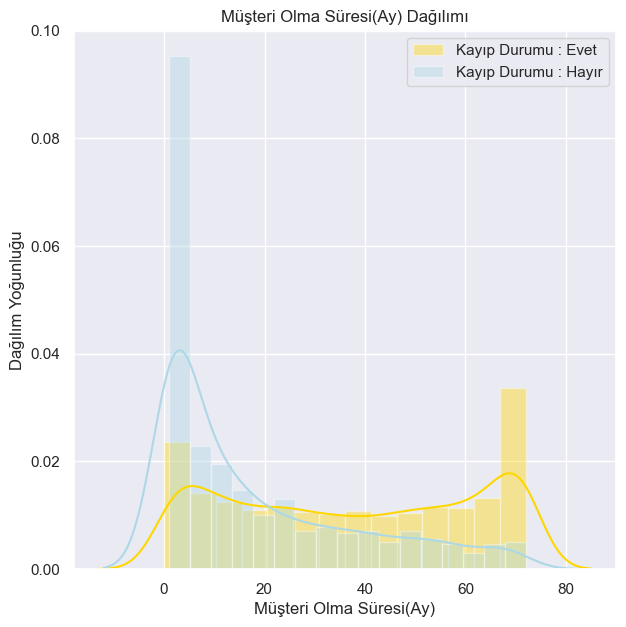

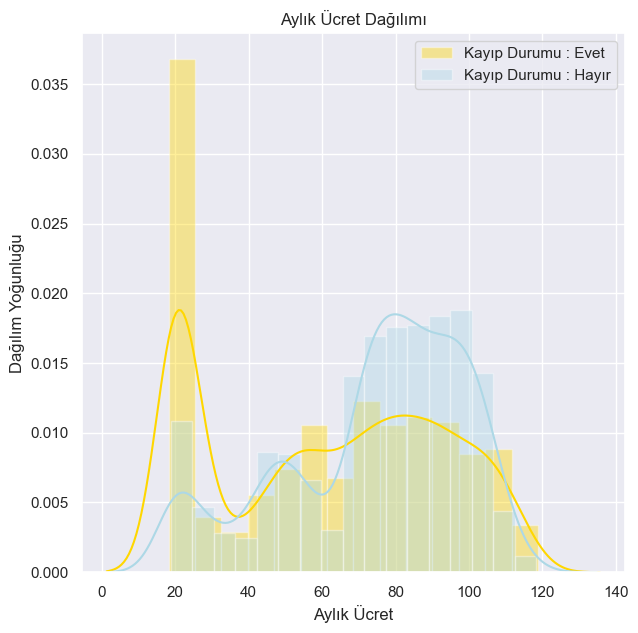

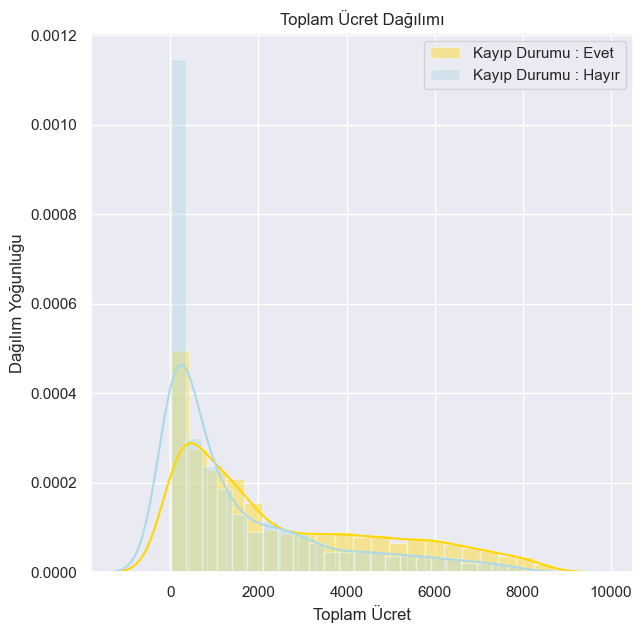

In [71]:
plot_distribution('Müşteri Olma Süresi(Ay)', bin_size=100)
plot_distribution('Aylık Ücret', bin_size=100)
plot_distribution('Toplam Ücret', bin_size=100)

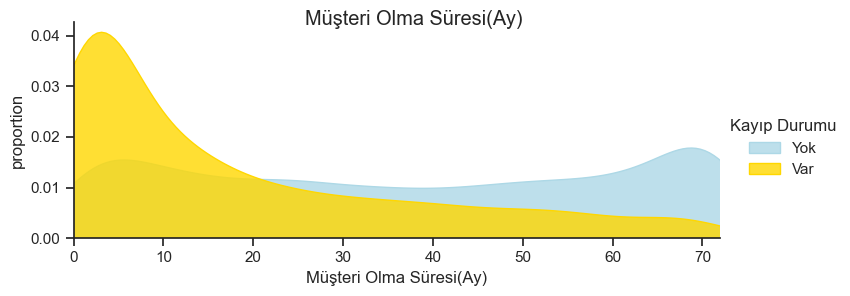

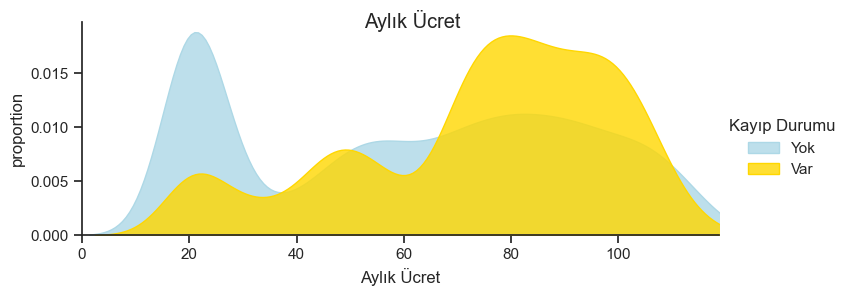

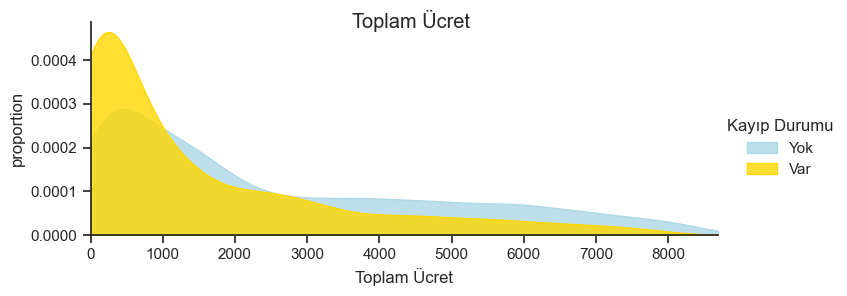

In [72]:
plot_distribution_num('Müşteri Olma Süresi(Ay)')
plot_distribution_num('Aylık Ücret')
plot_distribution_num('Toplam Ücret')

# Nümerik Değişkenlerin Kayıp Durumu Değişkenine Göre Dağılımları

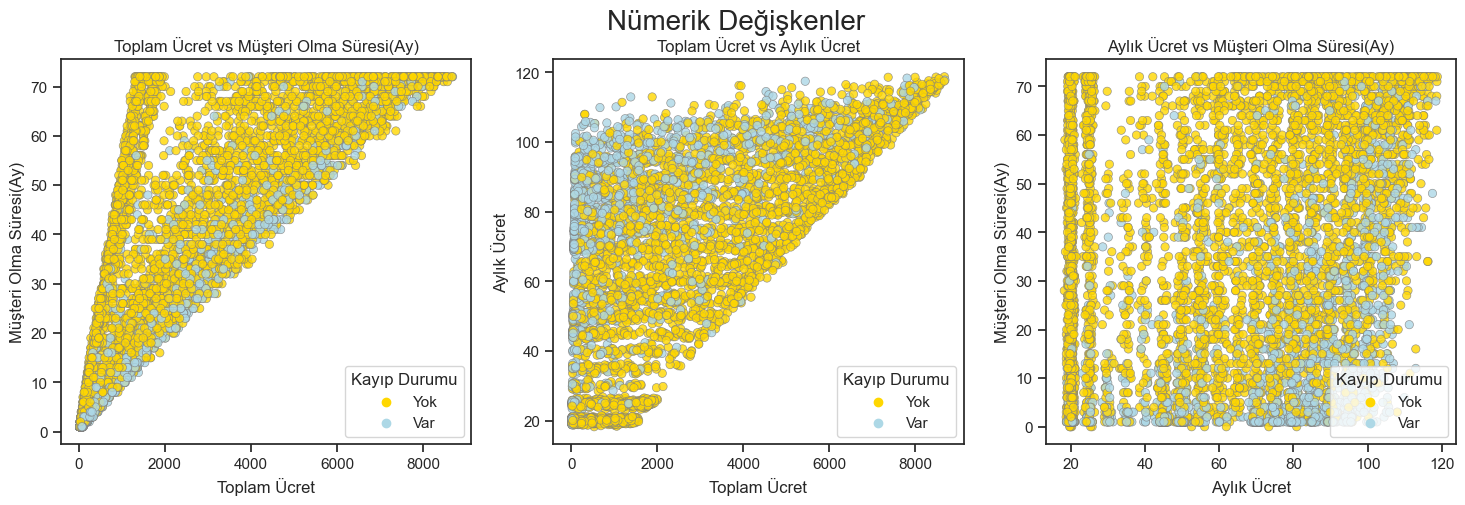

In [73]:
palette ={"Var" : 'lightblue', "Yok" : 'gold'}
edgecolor = 'grey'
fig = plt.figure(figsize=(18,5))
alpha = 0.8

plt.subplot(131)
ax1 = sns.scatterplot(x = df['Toplam Ücret'], y = df['Müşteri Olma Süresi(Ay)'], hue = "Kayıp Durumu",
                    data = df, palette = palette, edgecolor=edgecolor, alpha = alpha)
plt.title('Toplam Ücret vs Müşteri Olma Süresi(Ay)')

plt.subplot(132)
ax2 = sns.scatterplot(x = df['Toplam Ücret'], y = df['Aylık Ücret'], hue = "Kayıp Durumu",
                    data = df, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('Toplam Ücret vs Aylık Ücret')

plt.subplot(133)
ax2 = sns.scatterplot(x = df['Aylık Ücret'], y = df['Müşteri Olma Süresi(Ay)'], hue = "Kayıp Durumu",
                    data = df, palette =palette, edgecolor=edgecolor, alpha = alpha)
plt.title('Aylık Ücret vs Müşteri Olma Süresi(Ay)')

fig.suptitle('Nümerik Değişkenler', fontsize = 20)
plt.savefig(r"D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\Nümerik Değişkenlerin Dağılımları")
plt.show()

# Nümerik Değişkenlerin Korelasyon Matrisi

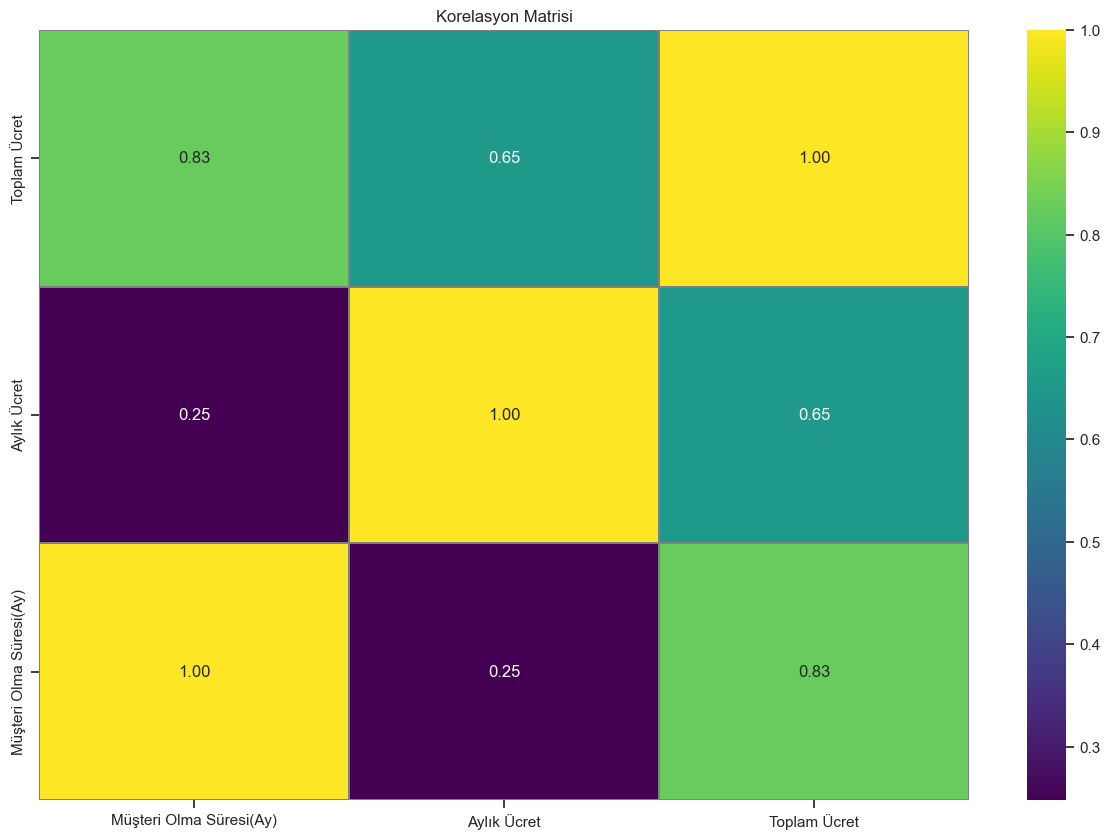

In [74]:
#65 yaş üstü depişkeni nümerik olarak almaması için böyle bir değişiklik yapıldı
df["65 Yaş Üstü"]=["Evet" if kod==1 else "Hayır" for kod in df["65 Yaş Üstü"]]

df_quant = df.select_dtypes(exclude=[object])
df_quant.head()
corr_quant = df_quant.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_quant, annot=True, cmap = 'viridis', linewidths = .1, linecolor = 'grey', fmt=".2f")
ax.invert_yaxis()
ax.set_title("Korelasyon Matrisi")
plt.savefig("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\Çıktılar\KorelasyonMatrisi.png")
plt.show()

# Kayıp Durumu Değişkenine göre bütün değişkenlerin Bar Plot Grafikleri

In [75]:
barplot('Cinsiyet', True)
#barplot('65 Yaş Üstü', True)
#barplot('Bakma Sorumluluğu', True)
#barplot('İnternet Aboneliği', True)
#barplot('Birden Fazla Abonelik Durumu', True)
#barplot('Güvenlik Hizmeti Aboneliği', True)
#barplot('Medeni Durum', True)
#barplot('Ekipman Güvenlik Aboneliği', True)
#barplot('Film Abonelği', True)
#barplot('Teknik Destek Aboneliği', True)
#barplot('IP Tv Aboneliği', True)
#barplot('Sözleşme Süresi', True)
#barplot('Online Fatura(Kağıtsız)', True)
#barplot('Ödeme Şekli', True)
#barplot('Yedekleme Hizmeti Aboneliği', True)
#barplot('Ev Telefonu Aboneliği', True)

# Kayıp Durumu Değişkenine göre bütün değişkenlerin Dağılım Grafikleri

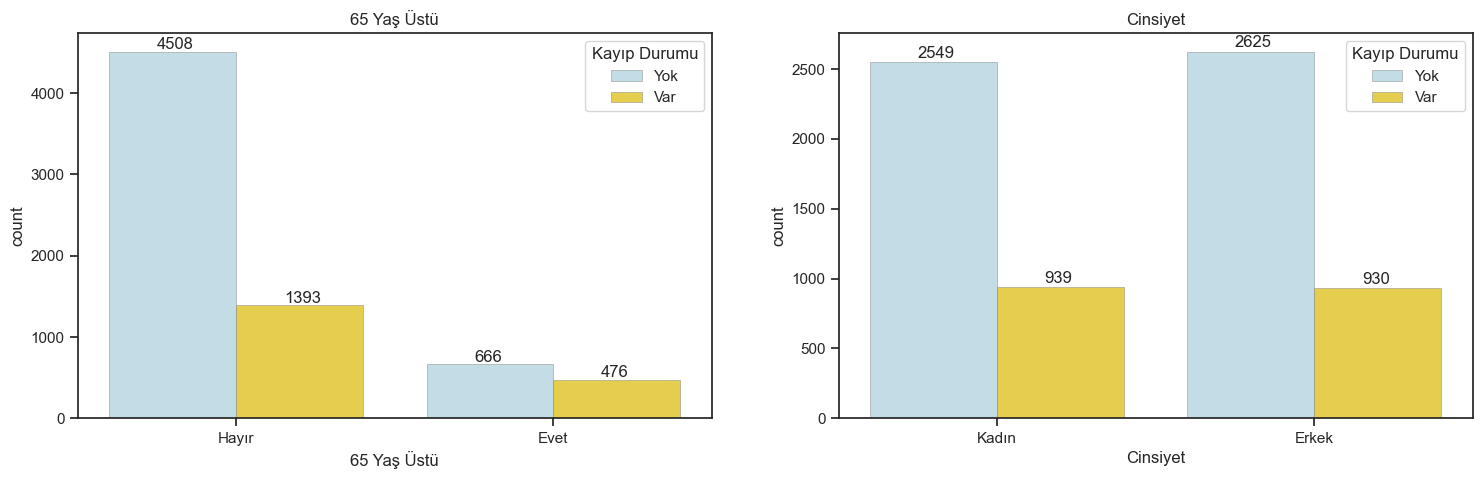

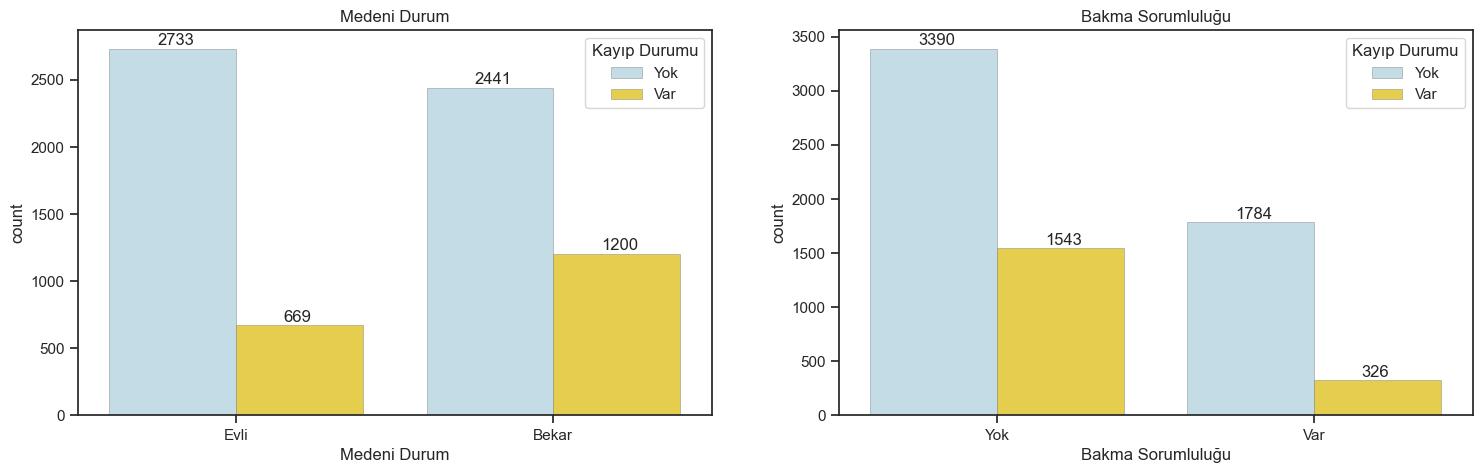

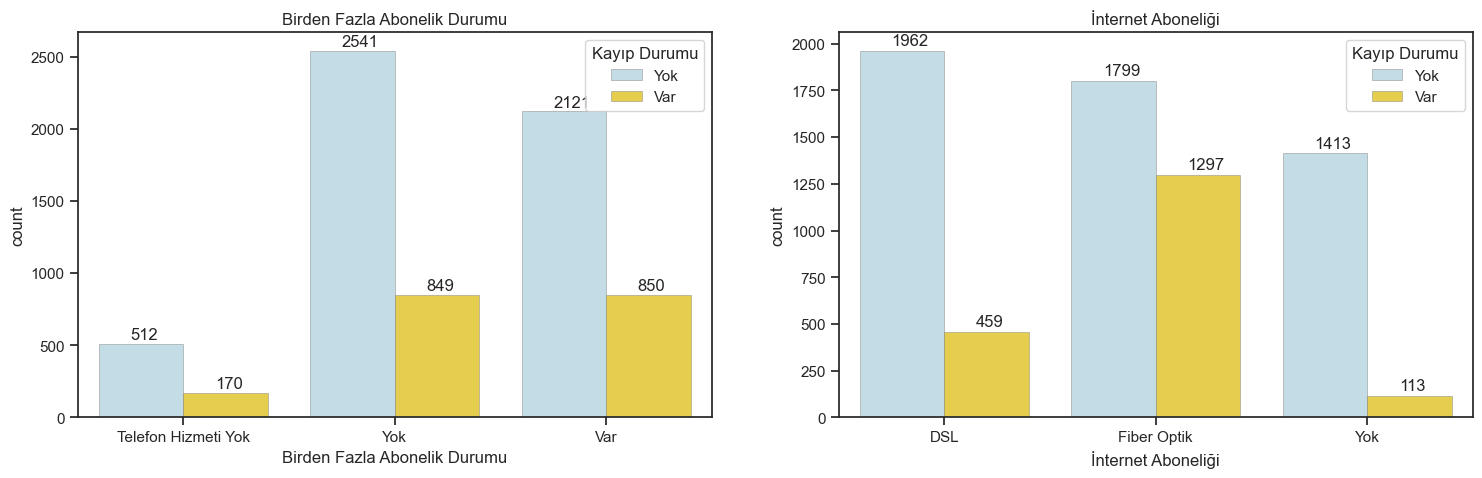

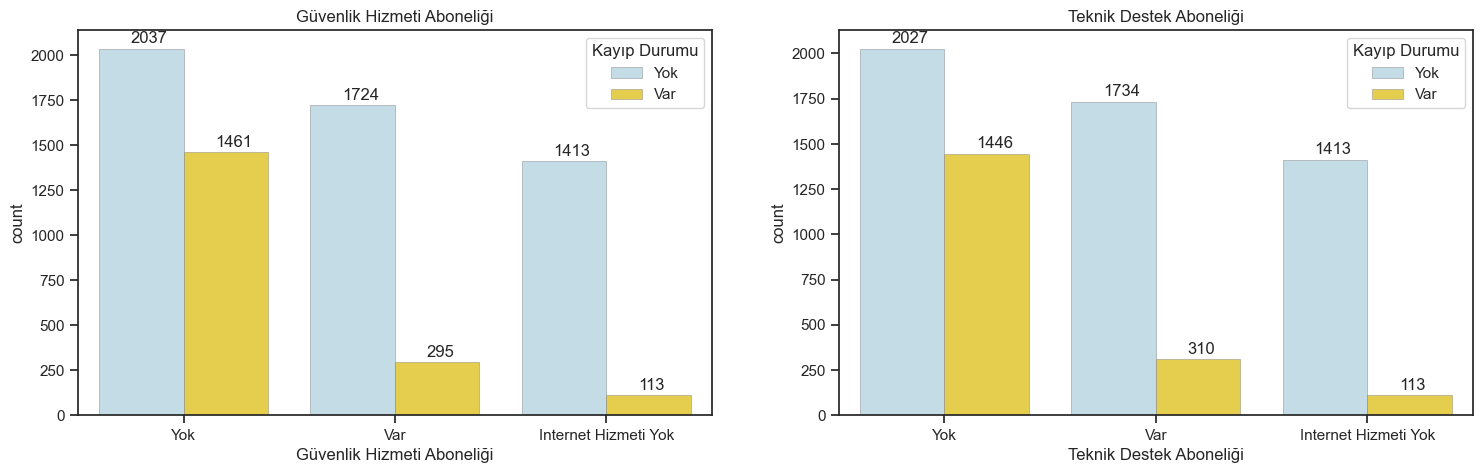

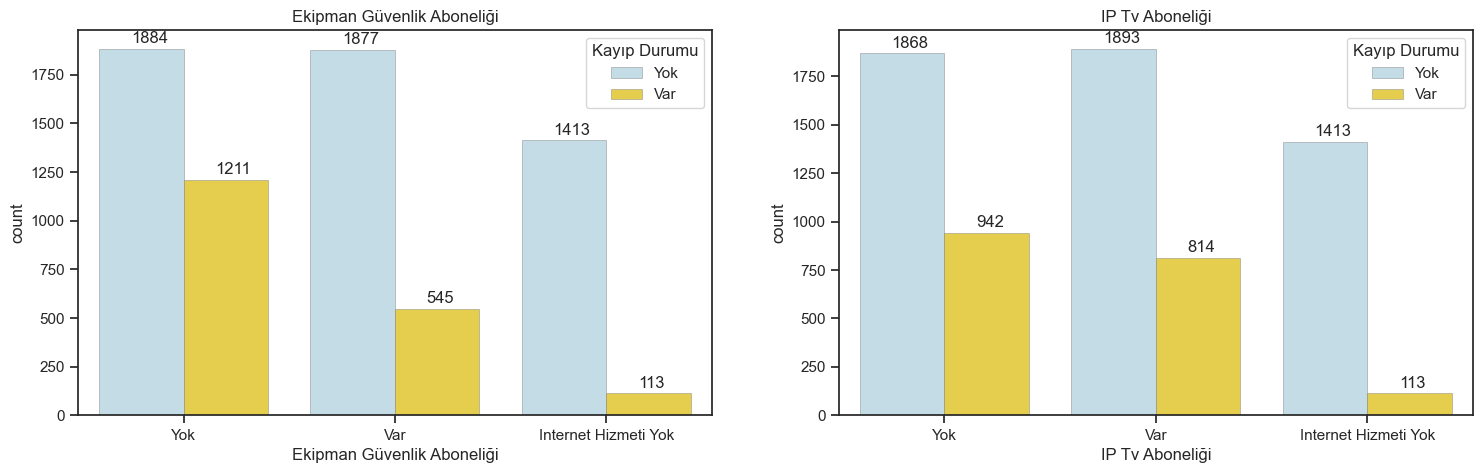

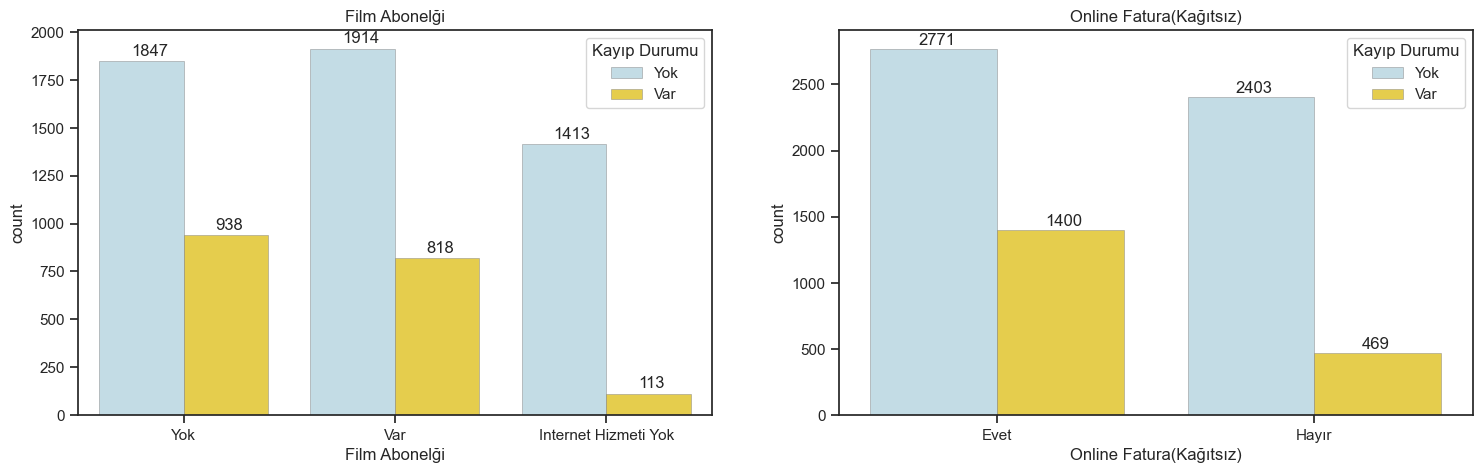

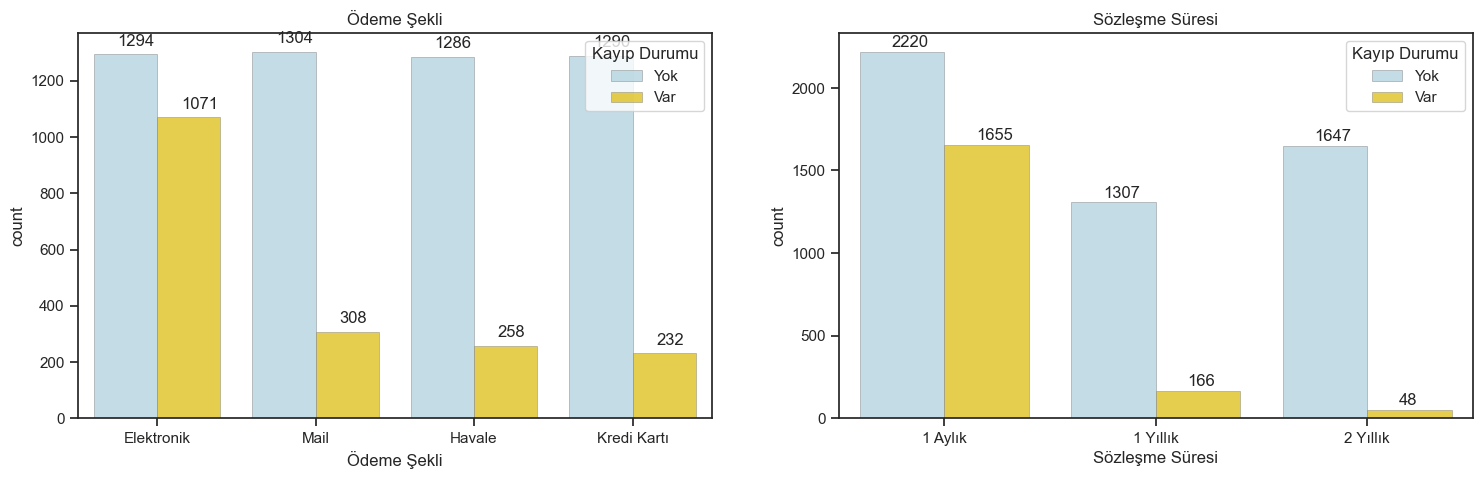

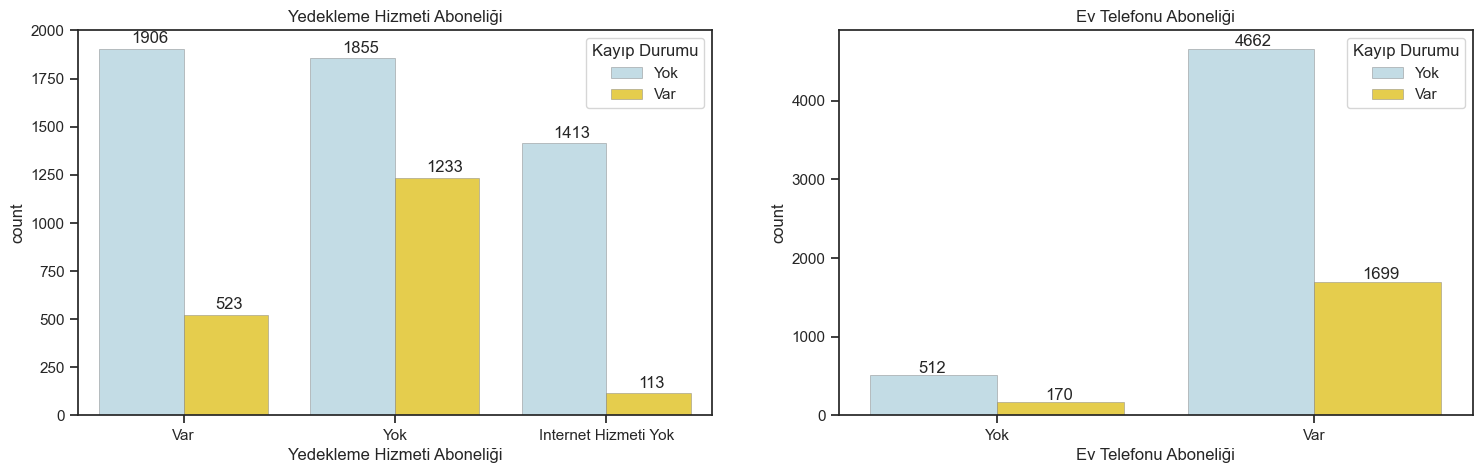

In [76]:
plot_distribution_cat('65 Yaş Üstü', 'Cinsiyet', df)
plot_distribution_cat('Medeni Durum', 'Bakma Sorumluluğu', df)
plot_distribution_cat('Birden Fazla Abonelik Durumu', 'İnternet Aboneliği', df)
plot_distribution_cat('Güvenlik Hizmeti Aboneliği', 'Teknik Destek Aboneliği', df)
plot_distribution_cat('Ekipman Güvenlik Aboneliği', 'IP Tv Aboneliği',df)
plot_distribution_cat('Film Abonelği', 'Online Fatura(Kağıtsız)',df)
plot_distribution_cat('Ödeme Şekli', 'Sözleşme Süresi',df)
plot_distribution_cat('Yedekleme Hizmeti Aboneliği', 'Ev Telefonu Aboneliği',df)